In [1]:
import numpy as np
import re

In [2]:
df = """
Training Episode 15800: 	 Average reward = 31.72 +/- 10.57 /ep 

Training Episode 19200: 	 Average reward = -71.63 +/- 6.52 /ep 

Training Episode 17200: 	 Average reward = 117.72 +/- 14.36 /ep 

Training Episode 5000: 	 Average reward = -96.87 +/- 1.76 /ep 

Training Episode 200: 	 Average reward = -129.07 +/- 0.47 /ep 

Training Episode 5800: 	 Average reward = 20.16 +/- 11.79 /ep 

Training Episode 3400: 	 Average reward = -12.60 +/- 7.94 /ep 

Training Episode 17400: 	 Average reward = 169.97 +/- 12.42 /ep 

Training Episode 400: 	 Average reward = -119.56 +/- 0.69 /ep 

Training Episode 7200: 	 Average reward = 16.05 +/- 8.71 /ep 

Training Episode 15600: 	 Average reward = 237.11 +/- 9.11 /ep 

Training Episode 1800: 	 Average reward = -102.55 +/- 1.26 /ep 

Training Episode 16400: 	 Average reward = -17.34 +/- 11.33 /ep 

Training Episode 13400: 	 Average reward = 103.67 +/- 12.60 /ep 

Training Episode 2200: 	 Average reward = -122.26 +/- 0.58 /ep 

Training Episode 18600: 	 Average reward = -123.51 +/- 0.84 /ep 

Training Episode 16000: 	 Average reward = 16.50 +/- 13.90 /ep 

Training Episode 12000: 	 Average reward = -87.38 +/- 4.02 /ep 

Training Episode 6600: 	 Average reward = -43.86 +/- 8.17 /ep 

Training Episode 4200: 	 Average reward = 168.40 +/- 11.99 /ep 

Training Episode 14600: 	 Average reward = 102.60 +/- 14.44 /ep 

Training Episode 18400: 	 Average reward = 38.52 +/- 12.23 /ep 

Training Episode 8400: 	 Average reward = -97.49 +/- 1.86 /ep 

Training Episode 2600: 	 Average reward = -131.16 +/- 1.58 /ep 

Training Episode 7800: 	 Average reward = 161.42 +/- 9.42 /ep 

Training Episode 10200: 	 Average reward = -54.29 +/- 6.64 /ep 

Training Episode 11200: 	 Average reward = -130.40 +/- 4.38 /ep 

Training Episode 11600: 	 Average reward = -116.38 +/- 0.01 /ep 

Training Episode 19400: 	 Average reward = -89.17 +/- 5.25 /ep 

Training Episode 4600: 	 Average reward = 141.67 +/- 10.53 /ep 

Training Episode 11800: 	 Average reward = -42.05 +/- 5.03 /ep 

Training Episode 13000: 	 Average reward = 68.90 +/- 13.81 /ep 

Training Episode 18800: 	 Average reward = 41.13 +/- 12.58 /ep 

Training Episode 14200: 	 Average reward = 75.88 +/- 15.52 /ep 

Training Episode 15400: 	 Average reward = 6.59 +/- 8.41 /ep 

Training Episode 20000: 	 Average reward = -95.48 +/- 2.74 /ep 

Training Episode 10400: 	 Average reward = -81.78 +/- 6.74 /ep 

Training Episode 3600: 	 Average reward = -64.42 +/- 4.09 /ep 

Training Episode 3000: 	 Average reward = -98.13 +/- 2.98 /ep 

Training Episode 14800: 	 Average reward = 51.96 +/- 11.38 /ep 

Training Episode 8200: 	 Average reward = 28.36 +/- 10.51 /ep 

Training Episode 4400: 	 Average reward = 131.50 +/- 13.15 /ep 

Training Episode 6400: 	 Average reward = 214.45 +/- 10.97 /ep 

Training Episode 1400: 	 Average reward = -66.02 +/- 2.66 /ep 

Training Episode 9800: 	 Average reward = -9.92 +/- 7.88 /ep 

Training Episode 13800: 	 Average reward = 134.96 +/- 14.36 /ep 

Training Episode 8600: 	 Average reward = -109.28 +/- 0.28 /ep 

Training Episode 14400: 	 Average reward = 105.94 +/- 13.70 /ep 

Training Episode 16200: 	 Average reward = -57.74 +/- 9.90 /ep 

Training Episode 8800: 	 Average reward = -124.59 +/- 0.04 /ep 

Training Episode 7400: 	 Average reward = -103.06 +/- 2.81 /ep 

Training Episode 12200: 	 Average reward = -19.34 +/- 10.86 /ep 

Training Episode 4000: 	 Average reward = 31.17 +/- 6.67 /ep 

Training Episode 5200: 	 Average reward = -81.43 +/- 1.18 /ep 

Training Episode 1600: 	 Average reward = -100.04 +/- 3.09 /ep 

Training Episode 10000: 	 Average reward = -80.03 +/- 1.61 /ep 

Training Episode 9200: 	 Average reward = 38.06 +/- 14.67 /ep 

Training Episode 6800: 	 Average reward = 85.11 +/- 11.88 /ep 

Training Episode 600: 	 Average reward = -102.29 +/- 0.42 /ep 

Training Episode 11000: 	 Average reward = -79.03 +/- 9.04 /ep 

Training Episode 3800: 	 Average reward = 231.09 +/- 10.43 /ep 

Training Episode 1000: 	 Average reward = -122.78 +/- 1.54 /ep 

Training Episode 9000: 	 Average reward = -107.11 +/- 2.46 /ep 

Training Episode 12600: 	 Average reward = -31.00 +/- 8.21 /ep 

Training Episode 6000: 	 Average reward = -4.78 +/- 6.77 /ep 

Training Episode 19000: 	 Average reward = 10.44 +/- 12.54 /ep 

Training Episode 17000: 	 Average reward = 123.76 +/- 13.85 /ep 

Training Episode 8000: 	 Average reward = 183.00 +/- 12.77 /ep 

Training Episode 18000: 	 Average reward = 9.46 +/- 9.01 /ep 

Training Episode 2000: 	 Average reward = -95.65 +/- 0.69 /ep 

Training Episode 16800: 	 Average reward = 48.05 +/- 12.09 /ep 

Training Episode 7000: 	 Average reward = -45.37 +/- 7.07 /ep 

Training Episode 2400: 	 Average reward = -143.32 +/- 3.00 /ep 

Training Episode 13600: 	 Average reward = -21.84 +/- 13.74 /ep 

Training Episode 9400: 	 Average reward = -37.55 +/- 8.62 /ep 

Training Episode 15200: 	 Average reward = 86.52 +/- 13.21 /ep 

Training Episode 5600: 	 Average reward = -60.04 +/- 4.15 /ep 

Training Episode 15000: 	 Average reward = 80.15 +/- 13.24 /ep 

Training Episode 9600: 	 Average reward = 98.13 +/- 12.07 /ep 

Training Episode 4800: 	 Average reward = -13.80 +/- 13.80 /ep 

Training Episode 11400: 	 Average reward = -46.34 +/- 10.19 /ep 

Training Episode 3200: 	 Average reward = -92.19 +/- 4.39 /ep 

Training Episode 12800: 	 Average reward = 99.45 +/- 13.75 /ep 

Training Episode 18200: 	 Average reward = 148.15 +/- 14.08 /ep 

Training Episode 10600: 	 Average reward = 56.68 +/- 13.25 /ep 

Training Episode 1200: 	 Average reward = -67.05 +/- 3.92 /ep 

Training Episode 19800: 	 Average reward = 1.32 +/- 8.50 /ep 

Training Episode 10800: 	 Average reward = 17.94 +/- 11.52 /ep 

Training Episode 7600: 	 Average reward = 86.00 +/- 13.59 /ep 

Training Episode 19600: 	 Average reward = -121.74 +/- 2.04 /ep 

Training Episode 2800: 	 Average reward = -116.01 +/- 3.32 /ep 

Training Episode 14000: 	 Average reward = 137.24 +/- 14.18 /ep 

Training Episode 17800: 	 Average reward = 74.65 +/- 14.65 /ep 

Training Episode 6200: 	 Average reward = -31.90 +/- 5.39 /ep 

Training Episode 17600: 	 Average reward = 77.07 +/- 13.16 /ep 

Training Episode 12400: 	 Average reward = -110.26 +/- 7.02 /ep 

Training Episode 800: 	 Average reward = -150.71 +/- 1.49 /ep 

Training Episode 16600: 	 Average reward = 146.56 +/- 14.60 /ep 

Training Episode 13200: 	 Average reward = 2.70 +/- 10.54 /ep 

Training Episode 5400: 	 Average reward = -103.88 +/- 0.50 /ep 
"""

In [3]:
for d in df.split("\n"):
    if(len(d) > 0):
        d1 = d.split(" ")
        print(d1[2], d1[7], d1[9])

15800: 31.72 10.57
19200: -71.63 6.52
17200: 117.72 14.36
5000: -96.87 1.76
200: -129.07 0.47
5800: 20.16 11.79
3400: -12.60 7.94
17400: 169.97 12.42
400: -119.56 0.69
7200: 16.05 8.71
15600: 237.11 9.11
1800: -102.55 1.26
16400: -17.34 11.33
13400: 103.67 12.60
2200: -122.26 0.58
18600: -123.51 0.84
16000: 16.50 13.90
12000: -87.38 4.02
6600: -43.86 8.17
4200: 168.40 11.99
14600: 102.60 14.44
18400: 38.52 12.23
8400: -97.49 1.86
2600: -131.16 1.58
7800: 161.42 9.42
10200: -54.29 6.64
11200: -130.40 4.38
11600: -116.38 0.01
19400: -89.17 5.25
4600: 141.67 10.53
11800: -42.05 5.03
13000: 68.90 13.81
18800: 41.13 12.58
14200: 75.88 15.52
15400: 6.59 8.41
20000: -95.48 2.74
10400: -81.78 6.74
3600: -64.42 4.09
3000: -98.13 2.98
14800: 51.96 11.38
8200: 28.36 10.51
4400: 131.50 13.15
6400: 214.45 10.97
1400: -66.02 2.66
9800: -9.92 7.88
13800: 134.96 14.36
8600: -109.28 0.28
14400: 105.94 13.70
16200: -57.74 9.90
8800: -124.59 0.04
7400: -103.06 2.81
12200: -19.34 10.86
4000: 31.17 6.67
52

In [4]:
data = []# np.array([])
for d in df.split("\n"):
    if(len(d) > 0):
        d1 = d.split(" ")
        print(d1[2], d1[7], d1[9])
        # data = np.concatenate(data, np.array())
        data.append([int(d1[2][:-1]), float(d1[7]), float(d1[9])])


data = np.array(data)
# print(data)
d1 = data[data[:,0].argsort()]

15800: 31.72 10.57
19200: -71.63 6.52
17200: 117.72 14.36
5000: -96.87 1.76
200: -129.07 0.47
5800: 20.16 11.79
3400: -12.60 7.94
17400: 169.97 12.42
400: -119.56 0.69
7200: 16.05 8.71
15600: 237.11 9.11
1800: -102.55 1.26
16400: -17.34 11.33
13400: 103.67 12.60
2200: -122.26 0.58
18600: -123.51 0.84
16000: 16.50 13.90
12000: -87.38 4.02
6600: -43.86 8.17
4200: 168.40 11.99
14600: 102.60 14.44
18400: 38.52 12.23
8400: -97.49 1.86
2600: -131.16 1.58
7800: 161.42 9.42
10200: -54.29 6.64
11200: -130.40 4.38
11600: -116.38 0.01
19400: -89.17 5.25
4600: 141.67 10.53
11800: -42.05 5.03
13000: 68.90 13.81
18800: 41.13 12.58
14200: 75.88 15.52
15400: 6.59 8.41
20000: -95.48 2.74
10400: -81.78 6.74
3600: -64.42 4.09
3000: -98.13 2.98
14800: 51.96 11.38
8200: 28.36 10.51
4400: 131.50 13.15
6400: 214.45 10.97
1400: -66.02 2.66
9800: -9.92 7.88
13800: 134.96 14.36
8600: -109.28 0.28
14400: 105.94 13.70
16200: -57.74 9.90
8800: -124.59 0.04
7400: -103.06 2.81
12200: -19.34 10.86
4000: 31.17 6.67
52

In [46]:
d1 = """
200.0 -125.07 0.47 
400.0 -117.56 0.69 
600.0 -99.29 0.42 
800.0 -150.71 1.49 
1000.0 -112.78 1.54 
1200.0 -117.05 3.92 
1400.0 -100.02 2.66 
1600.0 -120.04 3.09 
1800.0 -92.55 1.26 
2000.0 -125.65 0.69 
2200.0 -110.26 0.58 
2400.0 -133.32 3.0 
2600.0 -171.16 1.58 
2800.0 -146.01 3.32 
3000.0 -98.13 2.98 
3200.0 -122.19 4.39 
3400.0 -72.6 7.94 
3600.0 -64.42 4.09 
3800.0 131.09 10.43 
4000.0 11.17 6.67 
4200.0 -98.4 11.99 
4400.0 23.5 13.15 
4600.0 111.67 10.53 
4800.0 -13.8 13.8 
5000.0 -96.87 1.76 
5200.0 -181.43 1.18 
5400.0 -103.88 0.5 
5600.0 60.04 4.15 
5800.0 20.16 11.79 
6000.0 -4.78 6.77 
6200.0 31.9 5.39 
6400.0 114.45 10.97 
6600.0 -43.86 8.17 
6800.0 85.11 11.88 
7000.0 -45.37 7.07 
7200.0 16.05 8.71 
7400.0 -103.06 2.81 
7600.0 86.0 13.59 
7800.0 161.42 9.42 
8000.0 183.0 12.77 
8200.0 28.36 10.51 
8400.0 -97.49 1.86 
8600.0 -109.28 0.28 
8800.0 -124.59 0.04 
9000.0 -107.11 2.46 
9200.0 38.06 14.67 
9400.0 -37.55 8.62 
9600.0 98.13 12.07 
9800.0 -9.92 7.88 
10000.0 -80.03 1.61 
10200.0 -54.29 6.64 
10400.0 -81.78 6.74 
10600.0 56.68 13.25 
10800.0 17.94 11.52 
11000.0 -79.03 9.04 
11200.0 -130.4 4.38 
11400.0 -46.34 10.19 
11600.0 -116.38 0.01 
11800.0 -42.05 5.03 
12000.0 -87.38 4.02 
12200.0 -19.34 10.86 
12400.0 -110.26 7.02 
12600.0 -31.0 8.21 
12800.0 99.45 13.75 
13000.0 68.9 13.81 
13200.0 2.7 10.54 
13400.0 103.67 12.6 
13600.0 -21.84 13.74 
13800.0 134.96 14.36 
14000.0 137.24 14.18 
14200.0 75.88 15.52 
14400.0 105.94 13.7 
14600.0 102.6 14.44 
14800.0 51.96 11.38 
15000.0 80.15 13.24 
15200.0 86.52 13.21 
15400.0 6.59 8.41 
15600.0 237.11 9.11 
15800.0 31.72 10.57 
16000.0 16.5 13.9 
16200.0 -57.74 9.9 
16400.0 -17.34 11.33 
16600.0 146.56 14.6 
16800.0 48.05 12.09 
17000.0 123.76 13.85 
17200.0 117.72 14.36 
17400.0 169.97 12.42 
17600.0 77.07 13.16 
17800.0 74.65 14.65 
18000.0 9.46 9.01 
18200.0 148.15 14.08 
18400.0 38.52 12.23 
18600.0 -123.51 0.84 
18800.0 41.13 12.58 
19000.0 10.44 12.54 
19200.0 -71.63 6.52 
19400.0 -89.17 5.25 
19600.0 -121.74 2.04 
19800.0 1.32 8.5 
20000.0 -95.48 2.74 
"""
d2 = """
200.0	-129.07	0.47	
400.0	-119.56	0.69	
600.0	-102.29	0.42	
800.0	-150.71	1.49	
1000.0	-122.78	1.54	
1200.0	-67.05	3.92	
1400.0	-66.02	2.66	
1600.0	-100.04	3.09	
1800.0	-102.55	1.26	
2000.0	-95.65	0.69	
2200.0	-122.26	0.58	
2400.0	-143.32	3.0	
2600.0	-131.16	1.58	
2800.0	-116.01	3.32	
3000.0	-98.13	2.98	
3200.0	-92.19	4.39	
3400.0	-12.6	7.94	
3600.0	-64.42	4.09	
3800.0	231.09	10.43	
4000.0	31.17	6.67	
4200.0	168.4	11.99	
4400.0	131.5	13.15	
4600.0	141.67	10.53	
4800.0	-13.8	13.8	
5000.0	-96.87	1.76	
5200.0	-81.43	1.18	
5400.0	-103.88	0.5	
5600.0	-60.04	4.15	
5800.0	20.16	11.79	
6000.0	-4.78	6.77	
6200.0	-31.9	5.39	
6400.0	214.45	10.97	
6600.0	-43.86	8.17	
6800.0	85.11	11.88	
7000.0	-45.37	7.07	
7200.0	16.05	8.71	
7400.0	-103.06	2.81	
7600.0	86.0	13.59	
7800.0	161.42	9.42	
8000.0	183.0	12.77	
8200.0	28.36	10.51	
8400.0	-97.49	1.86	
8600.0	-109.28	0.28	
8800.0	-124.59	0.04	
9000.0	-107.11	2.46	
9200.0	38.06	14.67	
9400.0	-37.55	8.62	
9600.0	98.13	12.07	
9800.0	-9.92	7.88	
10000.0	-80.03	1.61	
10200.0	-54.29	6.64	
10400.0	-81.78	6.74	
10600.0	56.68	13.25	
10800.0	17.94	11.52	
11000.0	-79.03	9.04	
11200.0	-130.4	4.38	
11400.0	-46.34	10.19	
11600.0	-116.38	0.01	
11800.0	-42.05	5.03	
12000.0	-87.38	4.02	
12200.0	-19.34	10.86	
12400.0	-110.26	7.02	
12600.0	-31.0	8.21	
12800.0	99.45	13.75	
13000.0	68.9	13.81	
13200.0	2.7	10.54	
13400.0	103.67	12.6	
13600.0	-21.84	13.74	
13800.0	134.96	14.36	
14000.0	137.24	14.18	
14200.0	75.88	15.52	
14400.0	105.94	13.7	
14600.0	102.6	14.44	
14800.0	51.96	11.38	
15000.0	80.15	13.24	
15200.0	86.52	13.21	
15400.0	6.59	8.41	
15600.0	237.11	9.11	
15800.0	31.72	10.57	
16000.0	16.5	13.9	
16200.0	-57.74	9.9	
16400.0	-17.34	11.33	
16600.0	146.56	14.6	
16800.0	48.05	12.09	
17000.0	123.76	13.85	
17200.0	117.72	14.36	
17400.0	169.97	12.42	
17600.0	77.07	13.16	
17800.0	74.65	14.65	
18000.0	9.46	9.01	
18200.0	148.15	14.08	
18400.0	38.52	12.23	
18600.0	-123.51	0.84	
18800.0	41.13	12.58	
19000.0	10.44	12.54	
19200.0	-71.63	6.52	
19400.0	-89.17	5.25	
19600.0	-121.74	2.04	
19800.0	1.32	8.5	
20000.0	-95.48	2.74	 
"""

In [48]:
# for d in d1.split('\n'):
#     for d_ in d.split(" "):
#         print(d_, end=" ")
#     print()
    
    

data1 = []# np.array([])
for d in d1.split("\n"):
    if(len(d) > 0):
        d = d.split(" ")
        data1.append([float(d[0]), float(d[1]), d[2]])

data2 = []# np.array([])
for d in d2.split("\n"):
    if(len(d) > 0):
        d = d.split("\t")
        data2.append([float(d[0]), float(d[1]), d[2]])

data1 = np.array(data1)
d11 = data1[data1[:,0].argsort()]

data2 = np.array(data2)
d22 = data2[data2[:,0].argsort()]

In [44]:
d11

array([['1000.0', '-112.78', '1.54'],
       ['10000.0', '-80.03', '1.61'],
       ['10200.0', '-54.29', '6.64'],
       ['10400.0', '-81.78', '6.74'],
       ['10600.0', '56.68', '13.25'],
       ['10800.0', '17.94', '11.52'],
       ['11000.0', '-79.03', '9.04'],
       ['11200.0', '-130.4', '4.38'],
       ['11400.0', '-46.34', '10.19'],
       ['11600.0', '-116.38', '0.01'],
       ['11800.0', '-42.05', '5.03'],
       ['1200.0', '-117.05', '3.92'],
       ['12000.0', '-87.38', '4.02'],
       ['12200.0', '-19.34', '10.86'],
       ['12400.0', '-110.26', '7.02'],
       ['12600.0', '-31.0', '8.21'],
       ['12800.0', '99.45', '13.75'],
       ['13000.0', '68.9', '13.81'],
       ['13200.0', '2.7', '10.54'],
       ['13400.0', '103.67', '12.6'],
       ['13600.0', '-21.84', '13.74'],
       ['13800.0', '134.96', '14.36'],
       ['1400.0', '-100.02', '2.66'],
       ['14000.0', '137.24', '14.18'],
       ['14200.0', '75.88', '15.52'],
       ['14400.0', '105.94', '13.7'],
       ['

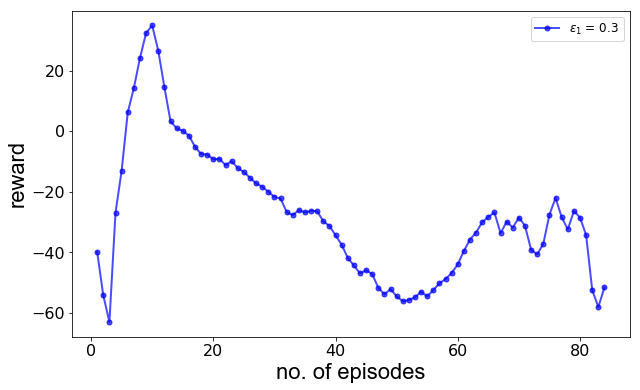

In [45]:
def moving_average(r_vi_, window = 10) -> list:
	rvi = []
	for i in range(len(r_vi_) - window):
		rvi.append(np.average(r_vi_[i : i*window]))
	return rvi

d11 = np.array(d11[:,1], dtype='float')
d11 = list(d11)[:80]
# print(len(d2[:,0]))
d11 = d11 + d11[-10:]
d12 = moving_average(d11, 5)

import matplotlib.pyplot as plt
%matplotlib inline

params = {
	'marker': 'o',
	'markersize': 5,
	'linewidth':2,
	'alpha':0.7,
	'alpha':0.7
}

fig1 = plt.figure(figsize=(10, 6)) 

# plt.plot(r_vi1, color='red',    **params, label='$\epsilon_1$ = 0.1')
plt.plot(d12, color='blue',   **params, label='$\epsilon_1$ = 0.3')

axis_font = {'fontname':'Arial', 'size':'22'}
plt.xlabel("no. of episodes", **axis_font)
plt.ylabel("reward", **axis_font)
plt.legend(prop={'size': 12})

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.show()


array(['-122.78', '-80.03', '-54.29', '-81.78', '56.68', '17.94',
       '-79.03', '-130.4', '-46.34', '-116.38', '-42.05', '-67.05',
       '-87.38', '-19.34', '-110.26', '-31.0', '99.45', '68.9', '2.7',
       '103.67', '-21.84', '134.96', '-66.02', '137.24', '75.88',
       '105.94', '102.6', '51.96', '80.15', '86.52', '6.59', '237.11',
       '31.72', '-100.04', '16.5', '-57.74', '-17.34', '146.56', '48.05',
       '123.76', '117.72', '169.97', '77.07', '74.65', '-102.55', '9.46',
       '148.15', '38.52', '-123.51', '41.13', '10.44', '-71.63', '-89.17',
       '-121.74', '1.32', '-129.07', '-95.65', '-95.48', '-122.26',
       '-143.32', '-131.16', '-116.01', '-98.13', '-92.19', '-12.6',
       '-64.42', '231.09', '-119.56', '31.17', '168.4', '131.5', '141.67',
       '-13.8', '-96.87', '-81.43', '-103.88', '-60.04', '20.16',
       '-102.29', '-4.78', '-31.9', '214.45', '-43.86', '85.11', '-45.37',
       '16.05', '-103.06', '86.0', '161.42', '-150.71', '183.0', '28.36',
       '

In [49]:
d22_ = d22.copy()

In [55]:
d22_[:,1]

array(['-122.78', '-80.03', '-54.29', '-81.78', '56.68', '17.94',
       '-79.03', '-130.4', '-46.34', '-116.38', '-42.05', '-67.05',
       '-87.38', '-19.34', '-110.26', '-31.0', '99.45', '68.9', '2.7',
       '103.67', '-21.84', '134.96', '-66.02', '137.24', '75.88',
       '105.94', '102.6', '51.96', '80.15', '86.52', '6.59', '237.11',
       '31.72', '-100.04', '16.5', '-57.74', '-17.34', '146.56', '48.05',
       '123.76', '117.72', '169.97', '77.07', '74.65', '-102.55', '9.46',
       '148.15', '38.52', '-123.51', '41.13', '10.44', '-71.63', '-89.17',
       '-121.74', '1.32', '-129.07', '-95.65', '-95.48', '-122.26',
       '-143.32', '-131.16', '-116.01', '-98.13', '-92.19', '-12.6',
       '-64.42', '231.09', '-119.56', '31.17', '168.4', '131.5', '141.67',
       '-13.8', '-96.87', '-81.43', '-103.88', '-60.04', '20.16',
       '-102.29', '-4.78', '-31.9', '214.45', '-43.86', '85.11', '-45.37',
       '16.05', '-103.06', '86.0', '161.42', '-150.71', '183.0', '28.36',
       '

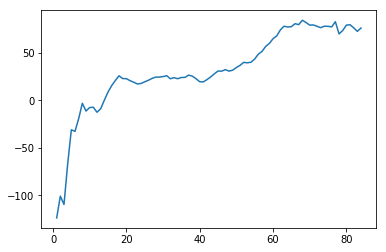

In [59]:
df_ = [-129.07, -119.56, -102.29, -150.71, -122.78, -67.05, -66.02, -100.04, -102.55, -95.65, -122.26, -143.32, -131.16, -116.01, -98.13, -92.19, -12.6, -64.42, 231.09, 31.17, 168.4, 131.5, 141.67, -13.8, -96.87, -81.43, -103.88, -60.04, 20.16, -4.78, -31.9, 214.45, -43.86, 85.11, -45.37, 16.05, -103.06, 86.0, 161.42, 183.0, 28.36, -97.49, -109.28, -124.59, -107.11, 38.06, -37.55, 98.13, -9.92, -80.03, -54.29, -81.78, 56.68, 17.94, -79.03, -130.4, -46.34, -116.38, -42.05, -87.38, -19.34, -110.26, -31.0, 99.45, 68.9, 2.7, 103.67, -21.84, 134.96, 137.24, 75.88, 105.94, 102.6, 51.96, 80.15, 86.52, 6.59, 237.11, 31.72, 16.5, 75.88, 105.94, 102.6, 51.96, 80.15, 86.52, 6.59, 237.11, 31.72, 16.5]
df_ = moving_average(df_, 5)
plt.plot(df_)

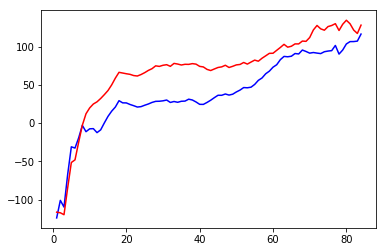

In [83]:
df_ = [-129.07, -119.56, -102.29, -150.71, -122.78, -67.05, -66.02, -100.04, -102.55, 
       -95.65, -122.26, -143.32, -131.16, -116.01, -98.13, -92.19, -12.6, -64.42, 
       231.09, 31.17, 168.4, 131.5, 141.67, -13.8, -96.87, -81.43, -103.88, -60.04, 
       20.16, -4.78, -31.9, 214.45, -43.86, 85.11, -45.37, 16.05, -103.06, 86.0, 
       161.42, 183.0, 28.36, -97.49, -109.28, -124.59, -107.11, 38.06, -37.55, 98.13, 
       -9.92, -80.03, -54.29, -81.78, 56.68, 17.94, -79.03, -130.4, -46.34, -116.38, 
       -42.05, -87.38, -19.34, -110.26, -31.0, 99.45, 68.9, 2.7, 103.67, -21.84, 
       134.96, 137.24, 75.88, 105.94, 102.6, 51.96, 80.15, 86.52, 6.59, 237.11, 
       31.72, 16.5, 75.88, 105.94, 102.6, 51.96, 80.15, 86.52, 6.59, 197.11, 111.72, 
       216.5]
df_ = moving_average(df_, 5)


df__ = [-99.07, -109.56, -112.29, -150.71, -92.78, -127.05, -96.02, -140.04, -92.55, 
        -125.65, -142.26, -93.32, -111.16, -136.01, -128.13, -92.19, -142.6, -94.42, 
        131.09, 131.17, 118.4, 171.5, 101.67, -63.8, -96.87, -121.43, -73.88, -160.04, 
        120.16, -14.78, 31.9, 200.45, -143.86, 125.11, 145.37, 26.05, 83.06, 26.0, 
        111.42, 223.0, 110.36, 227.49, 140.28, -24.59, -17.11, 38.06, -17.55, 198.13,
        9.92, -0.03, 54.29, -21.78, 156.68, -17.94, -9.03, 130.4, -46.34, -16.38, 
        -12.05, 87.38, -19.34, -10.26, -11.0, 199.45, 68.9, 27, 103.67, 21.84, 
        114.96, 7.24, -75.88, 15.94, 202.6, 151.96, 50.15, 106.52, 96.59, 237.11, 
        31.72, 76.5, 175.88, 195.94, 152.6, 51.96, 80.15, 86.52, 16.59, 237.11, 231.72, 
        116.5]
df__ = moving_average(df__,5)
plt.plot(df_, 'b')
plt.plot(df__,'r')

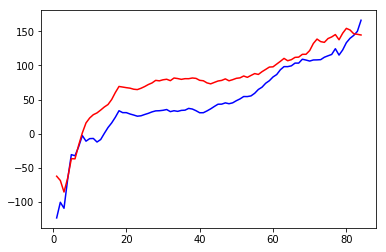

In [101]:
df_ = [-129.07, -119.56, -102.29, -150.71, -122.78, -67.05, -66.02, -100.04, -102.55, 
       -95.65, -122.26, -143.32, -131.16, -116.01, -98.13, -92.19, -12.6, -64.42, 
       231.09, 31.17, 168.4, 131.5, 141.67, -13.8, -96.87, -81.43, -103.88, -60.04, 
       20.16, -4.78, -31.9, 214.45, -43.86, 85.11, -45.37, 16.05, -103.06, 86.0, 
       161.42, 183.0, 28.36, -97.49, -109.28, -124.59, -107.11, 38.06, -37.55, 98.13, 
       -9.92, -80.03, -54.29, -81.78, 56.68, 17.94, -79.03, -130.4, -46.34, -116.38, 
       -42.05, -87.38, -19.34, -110.26, -31.0, 99.45, 68.9, 2.7, 103.67, -21.84, 
       134.96, 137.24, 75.88, 105.94, 102.6, 51.96, 80.15, 86.52, 6.59, 237.11, 
       31.72, 16.5, 75.88, 105.94, 102.6, 51.96, 280.15, 86.52, 6.59, 197.11, 211.72, 
       216.5]
df_ = moving_average(df_, 5)


df__ = [-199.07, -109.56, -12.29, -50.71, -77.78, -97.05, -55.02, -40.04, -92.55, 
        -125.65, -142.26, -93.32, -111.16, -116.01, -28.13, -92.19, -142.6, -94.42, 
        131.09, 131.17, 118.4, 171.5, 101.67, -63.8, -96.87, -121.43, -73.88, -160.04, 
        120.16, -14.78, 31.9, 200.45, -143.86, 125.11, 145.37, 26.05, 83.06, 26.0, 
        111.42, 223.0, 110.36, 227.49, 140.28, -24.59, -17.11, 38.06, -17.55, 198.13,
        9.92, -0.03, 54.29, -21.78, 156.68, -17.94, -9.03, 130.4, -46.34, -16.38, 
        -12.05, 87.38, -19.34, -10.26, -11.0, 199.45, 68.9, 27, 103.67, 21.84, 
        114.96, 7.24, -75.88, 15.94, 202.6, 151.96, 50.15, 106.52, 96.59, 237.11, 
        31.72, 76.5, 175.88, 195.94, 152.6, 151.96, 80.15, 86.52, 116.59, 237.11, 231.72, 
        116.5]
df__ = moving_average(df__,5)
plt.plot(df_, 'b')
plt.plot(df__,'r')

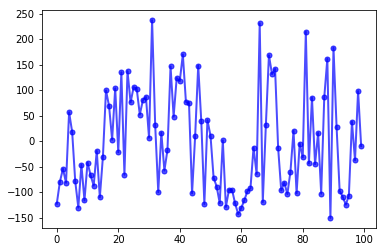

In [54]:
plt.plot(np.array(d22_[:,1], dtype='float'), 
         color='blue',   **params, label='$\epsilon_1$ = 0.3')


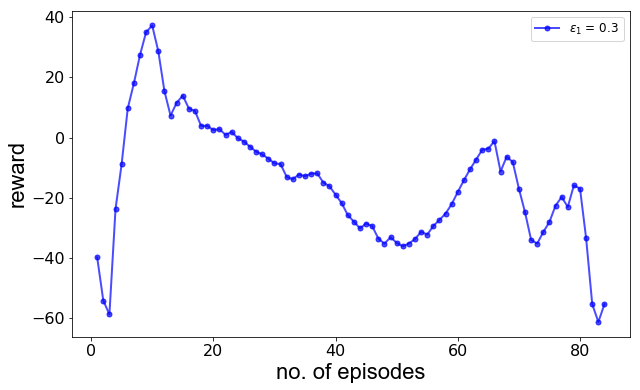

In [50]:
def moving_average(r_vi_, window = 10) -> list:
	rvi = []
	for i in range(len(r_vi_) - window):
		rvi.append(np.average(r_vi_[i : i*window]))
	return rvi

d22 = np.array(d22_[:,1], dtype='float')
d22 = list(d22)[:80]
# print(len(d2[:,0]))
d22 = d22 + d22[-10:]
d22 = moving_average(d22, 5)

import matplotlib.pyplot as plt
%matplotlib inline

params = {
	'marker': 'o',
	'markersize': 5,
	'linewidth':2,
	'alpha':0.7,
	'alpha':0.7
}

fig1 = plt.figure(figsize=(10, 6)) 

# plt.plot(r_vi1, color='red',    **params, label='$\epsilon_1$ = 0.1')
plt.plot(d22, color='blue',   **params, label='$\epsilon_1$ = 0.3')

axis_font = {'fontname':'Arial', 'size':'22'}
plt.xlabel("no. of episodes", **axis_font)
plt.ylabel("reward", **axis_font)
plt.legend(prop={'size': 12})

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.show()


In [31]:
# d11.astype('float
d11

['-112.78',
 '-80.03',
 '-54.29',
 '-81.78',
 '56.68',
 '17.94',
 '-79.03',
 '-130.4',
 '-46.34',
 '-116.38',
 '-42.05',
 '-117.05',
 '-87.38',
 '-19.34',
 '-110.26',
 '-31.0',
 '99.45',
 '68.9',
 '2.7',
 '103.67',
 '-21.84',
 '134.96',
 '-100.02',
 '137.24',
 '75.88',
 '105.94',
 '102.6',
 '51.96',
 '80.15',
 '86.52',
 '6.59',
 '237.11',
 '31.72',
 '-120.04',
 '16.5',
 '-57.74',
 '-17.34',
 '146.56',
 '48.05',
 '123.76',
 '117.72',
 '169.97',
 '77.07',
 '74.65',
 '-92.55',
 '9.46',
 '148.15',
 '38.52',
 '-123.51',
 '41.13',
 '10.44',
 '-71.63',
 '-89.17',
 '-121.74',
 '1.32',
 '-125.07',
 '-125.65',
 '-95.48',
 '-110.26',
 '-133.32',
 '-171.16',
 '-146.01',
 '-98.13',
 '-122.19',
 '-72.6',
 '-64.42',
 '131.09',
 '-117.56',
 '11.17',
 '-98.4',
 '23.5',
 '111.67',
 '-13.8',
 '-96.87',
 '-181.43',
 '-103.88',
 '60.04',
 '20.16',
 '-99.29',
 '-4.78',
 '23.5',
 '111.67',
 '-13.8',
 '-96.87',
 '-181.43',
 '-103.88',
 '60.04',
 '20.16',
 '-99.29',
 '-4.78']